In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from pandas import cut
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib.backends.backend_pdf import PdfPages

sns.set_palette("Set2")
sns.set_style("ticks")

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_labels = pd.read_csv('submission_format.csv', index_col='building_id')
train = train_values.merge(train_labels, how = 'inner', on = 'building_id')

In [4]:
pd.set_option('display.max_columns', None)
train_values 

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [6]:
train_values.columns


Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [7]:
train_values.isna().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [8]:

selected_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq','age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'count_families']

train_values_subset = train_values[selected_features]

In [9]:

test_values.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000
mean,13.888198,704.128125,6261.758565,2.133145,26.550168,8.013906,5.436098,0.089953,0.762502,0.034466,0.018568,0.067459,0.073836,0.253534,0.083679,0.042501,0.015794,0.015207,0.983112,0.111468,0.064097,0.033867,0.008242,0.001013,0.000368,0.001002,0.000104,0.000115,0.000046,0.004904
std,8.029576,413.364015,3648.712191,0.728047,73.413489,4.377899,1.906950,0.286115,0.425552,0.182424,0.134996,0.250816,0.261506,0.435036,0.276907,0.201731,0.124679,0.122376,0.422363,0.314713,0.244928,0.180889,0.090413,0.031812,0.019190,0.031631,0.010178,0.010729,0.006786,0.069857
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,709.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1054.000000,9416.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,8.000000,995.000000,92.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


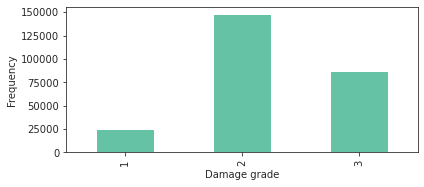

In [20]:
with PdfPages('damage.pdf') as pdf:
    plt.figure(figsize=(6,2.7))
    (train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(ylabel='Frequency', xlabel= 'Damage grade'))
    plt.tight_layout() 
    pdf.savefig()

In [14]:
train['damage_grade'] = train['damage_grade'].astype('category')
train['damage_grade'] = train['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})

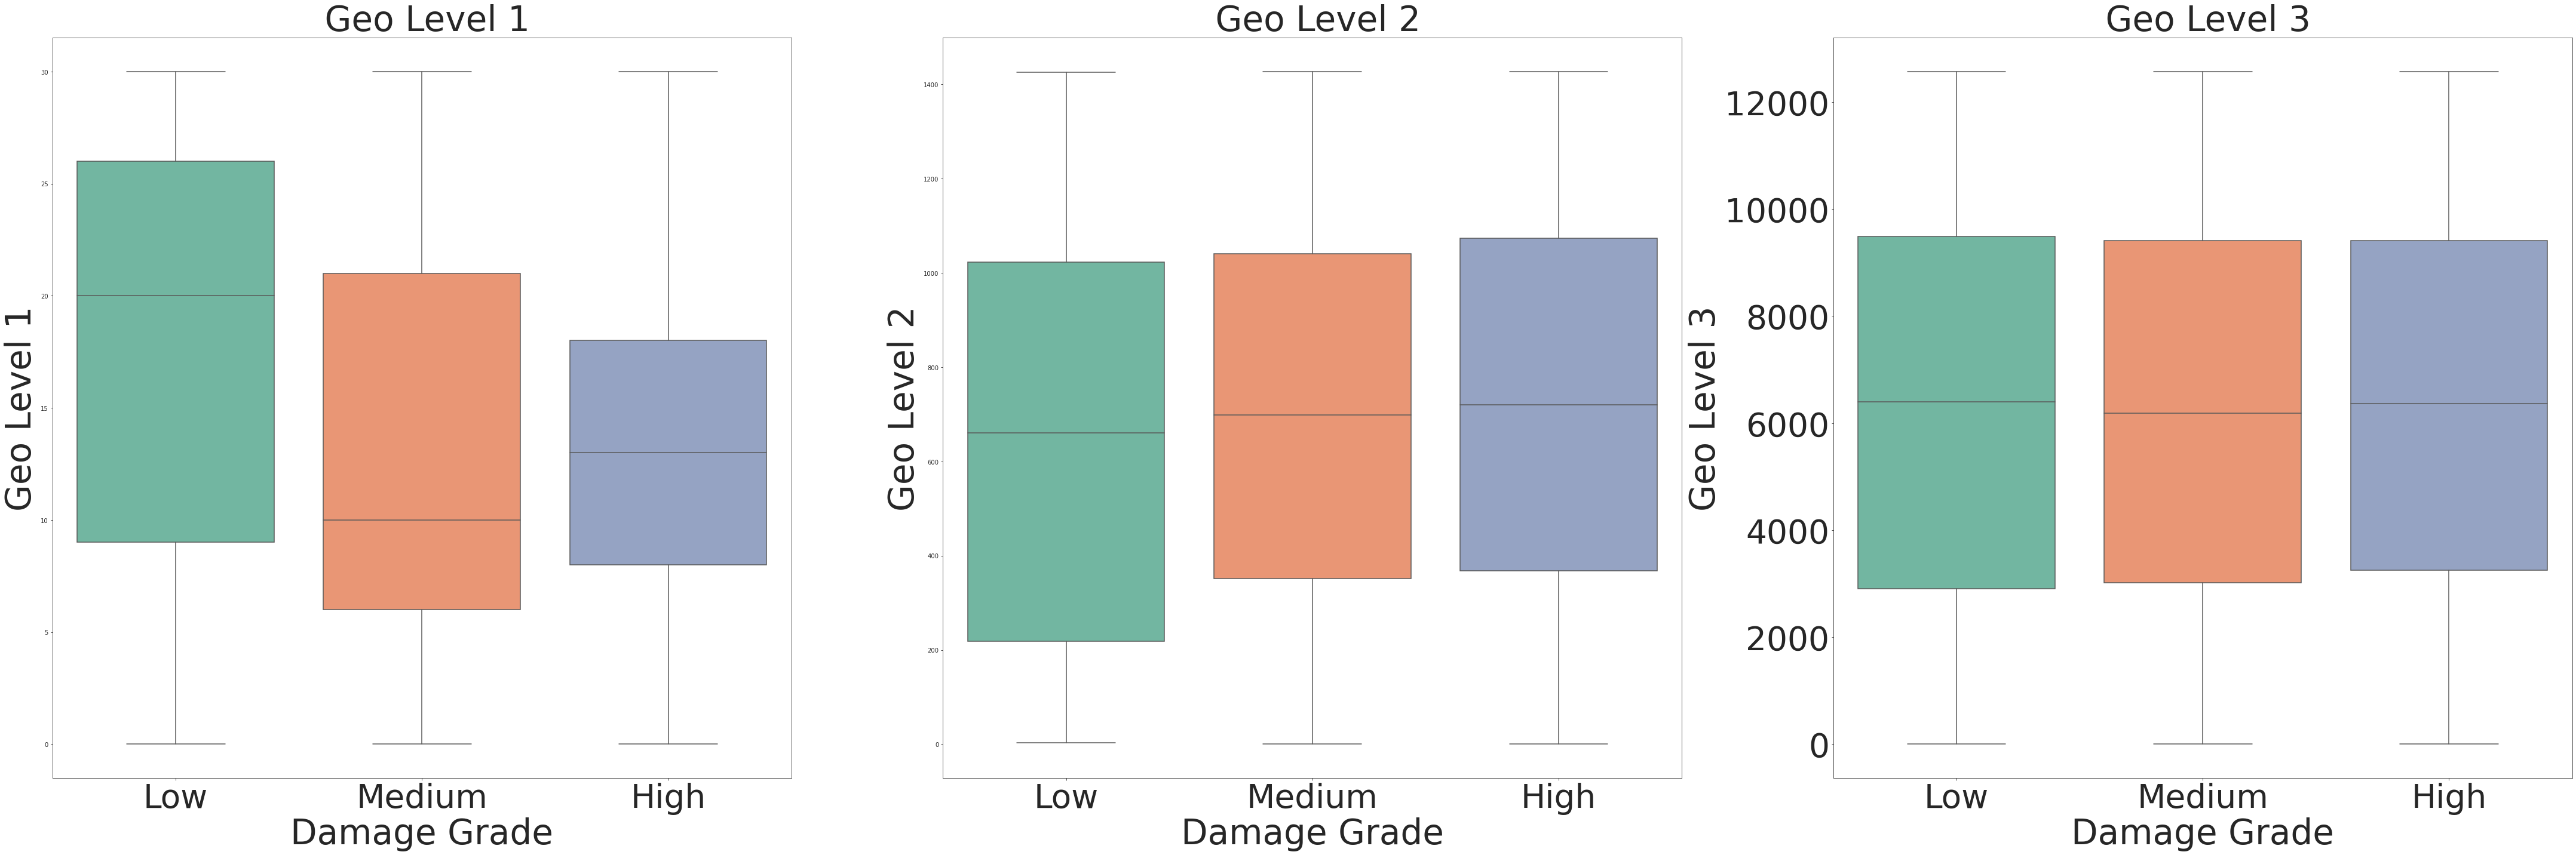

In [15]:

with PdfPages('box.pdf') as pdf:
    fig = plt.figure(figsize=(60,20))

    geo_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

    for i in range(1,4):
        plt.subplot(int(f'13{i}'))
        sns.boxplot(train['damage_grade'], train_values[geo_col[i-1]], order=['Low', 'Medium', 'High'])
        plt.xlabel('Damage Grade', fontsize=58)
        plt.ylabel(f'Geo Level {i}', fontsize=58)
        plt.title(f' Geo Level {i}', fontsize=58)
        #plt.rc('xtick', labelsize=55) 
        #plt.rc('ytick', labelsize=55) 
        plt.xticks(fontsize=55)
    plt.yticks(fontsize=55)
    plt.tight_layout()    
    pdf.savefig()

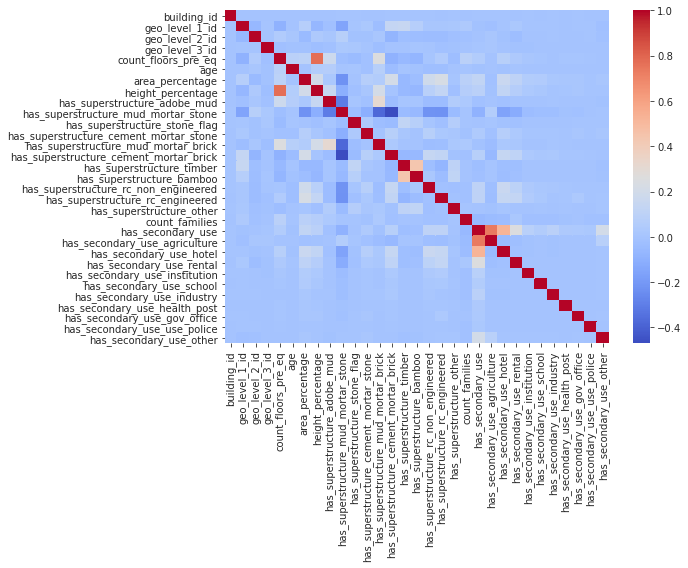

In [16]:
with PdfPages('cor.pdf') as pdf:
    plt.figure(figsize=(10,8))
    corr = train.corr()
    sns.heatmap(corr, cmap='coolwarm')
    plt.tight_layout() 
    pdf.savefig()

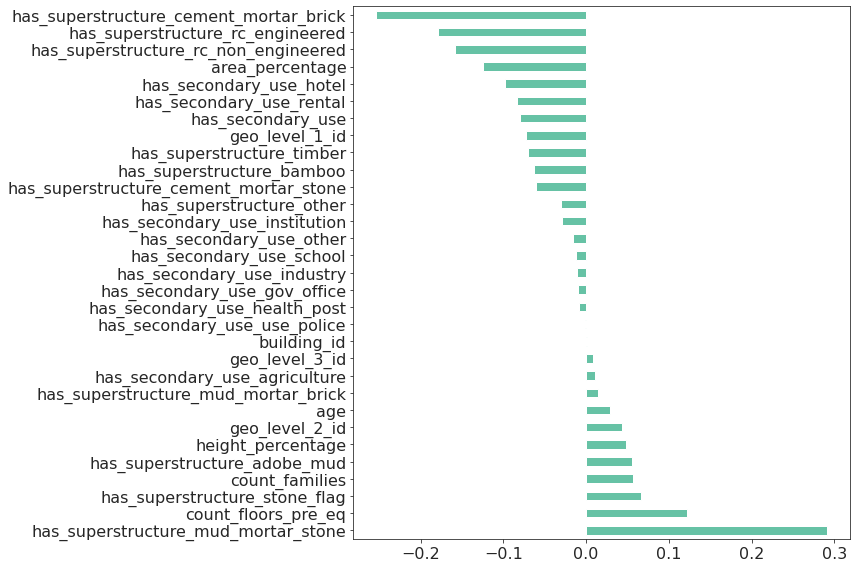

In [17]:
with PdfPages('cor.pdf') as pdf:
    features = train.copy()
    features['damage_grade'] = features['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
    features['damage_grade'] = features['damage_grade'].astype('int64')
    corr_matrix = features.corr()
    plt.figure(figsize=(12,8))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
    plt.tight_layout() 
    pdf.savefig()

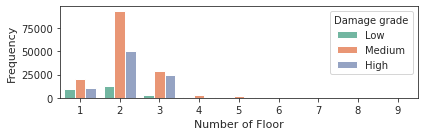

In [21]:
with PdfPages('floor.pdf') as pdf:
    fig = plt.figure(figsize=(6,2))

    floor_family_col = ['count_floors_pre_eq']
    floor_family_label = ['Number of Floor']
    #floor_family_title = ['Number of Floor Before Earthquake']

    for i in range(1,2):
        #plt.subplot(int(f'12{i}'))
        sns.countplot(train[floor_family_col[i-1]], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
        plt.xlabel(f'{floor_family_label[i-1]}', fontsize=11)
        plt.ylabel('Frequency', fontsize=11)
        #plt.title(f'{floor_family_title[i-1]}')
        plt.legend(loc='upper right', title= "Damage grade")
    #plt.show()
    plt.tight_layout() 
    pdf.savefig()

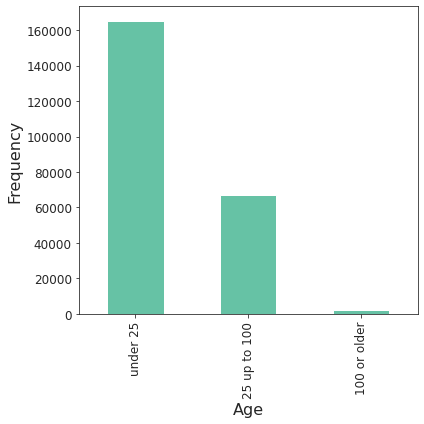

In [16]:
with PdfPages('age.pdf') as pdf:
    plt.figure(figsize=(6,6))
    train_values_subset['age_bin'] = cut(train_values_subset['age'], [0, 25, 100, float('inf')], labels=['under 25', '25 up to 100', '100 or older'])
    train_values_subset['age_bin'].value_counts().sort_index().plot.bar()
    plt.xlabel('Age', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout() 
    pdf.savefig()

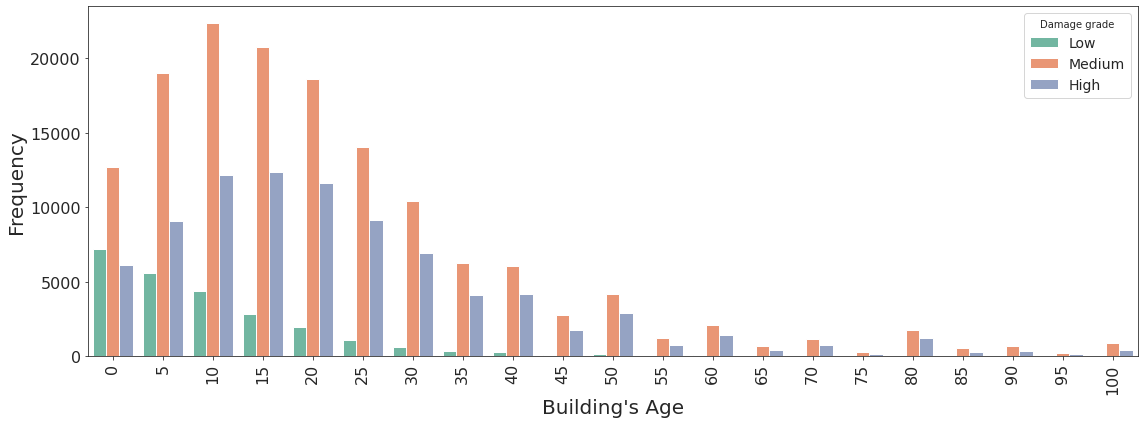

In [22]:
with PdfPages('age-dist.pdf') as pdf:
    plt.figure(figsize=(16,6))

    segment_1_age = train[train['age']<=100]
    sns.countplot(x=segment_1_age["age"],hue=segment_1_age["damage_grade"],hue_order=['Low', 'Medium', 'High'])
    plt.ylabel("Frequency",fontsize=20)
    plt.xlabel("Building's Age",fontsize=20)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(fontsize=16)
    #plt.title("Age Histograms")
    plt.legend(["Low","Medium","High"],title="Damage grade", loc=1,prop={'size': 14})
    plt.tight_layout() 
    pdf.savefig()

<AxesSubplot:>

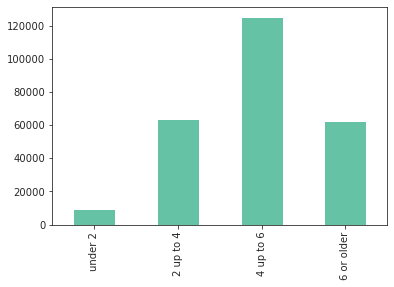

In [18]:

train_values_subset['height_bin'] = cut(train_values_subset['height_percentage'], [0, 2, 4, 6, float('inf')], labels=['under 2', '2 up to 4',  '4 up to 6','6 or older'])
train_values_subset['height_bin'].value_counts().sort_index().plot.bar()

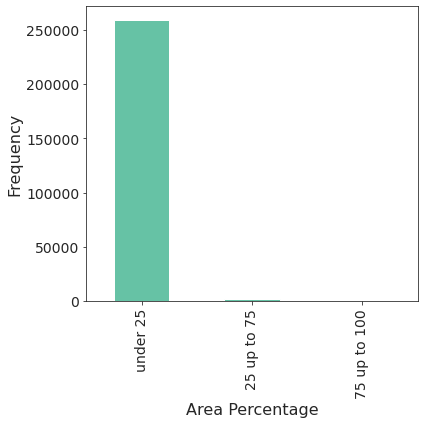

In [19]:
with PdfPages('area-freq.pdf') as pdf:
    plt.figure(figsize=(6,6))
    train_values_subset['area_bin'] = cut(train_values_subset['area_percentage'], [1,25, 75,100], labels=['under 25', '25 up to 75', '75 up to 100'])
    train_values_subset['area_bin'].value_counts().sort_index().plot.bar()
    plt.xlabel('Area Percentage', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout() 
    pdf.savefig()

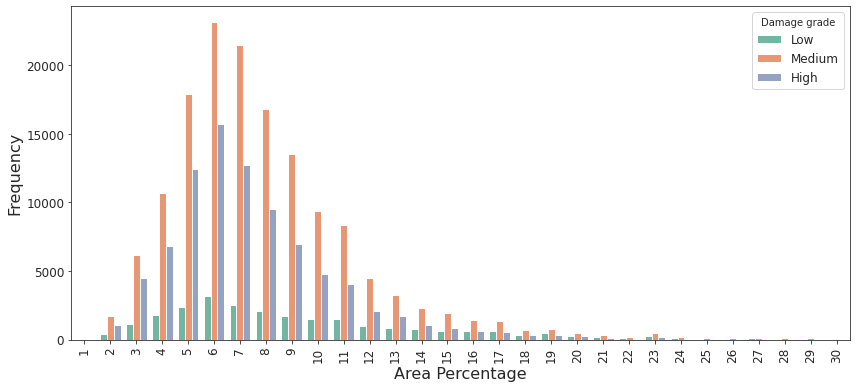

In [31]:
with PdfPages('area-dist.pdf') as pdf:
    plt.figure(figsize=(12,5.5))
    area_segment = train[train['area_percentage'] <=30]
    sns.countplot(x=area_segment["area_percentage"],hue=area_segment["damage_grade"])
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Area Percentage",fontsize=16)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    #plt.title("Area Percentage Histograms")
    plt.legend(["Low","Medium","High"],title="Damage grade", loc=1,prop={'size': 12})
    plt.tight_layout() 
    pdf.savefig()

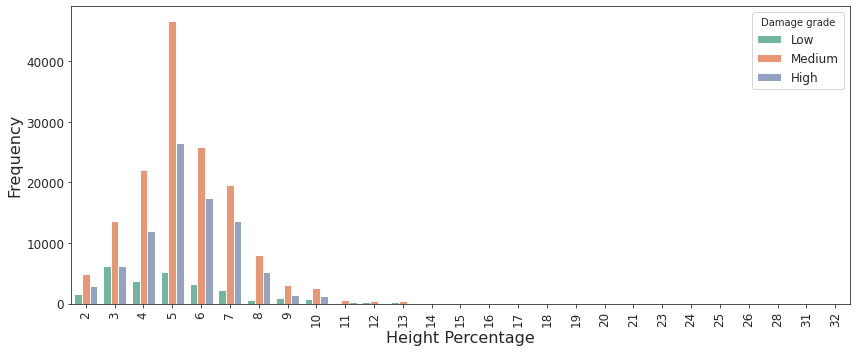

In [29]:
with PdfPages('height-dist.pdf') as pdf:
    plt.figure(figsize=(12,5))
    sns.countplot(x=train["height_percentage"],hue=train["damage_grade"])
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Height Percentage",fontsize=16)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    #plt.title("Height Percentage Histograms")
    plt.legend(["Low","Medium","High"],title="Damage grade", loc=1,prop={'size': 12})
    #plt.show()
    plt.tight_layout() 
    pdf.savefig()

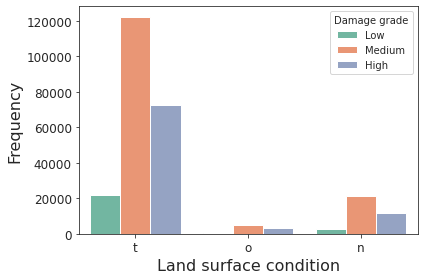

In [49]:
with PdfPages('land.pdf') as pdf:
    sns.countplot(x = train["land_surface_condition"], hue = train["damage_grade"], hue_order=['Low', 'Medium', 'High'])
    #plt.title("Land Surface Condition Distribution")
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Land surface condition",fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper right', title="Damage grade")
    plt.tight_layout() 
    pdf.savefig()

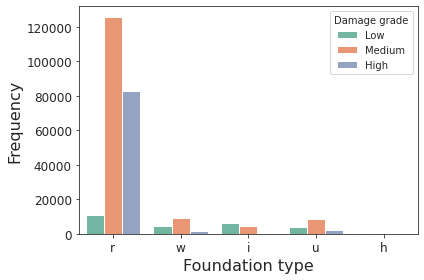

In [50]:
with PdfPages('foundation.pdf') as pdf:
    sns.countplot(x = train["foundation_type"], hue = train["damage_grade"], hue_order=['Low', 'Medium', 'High'])
   # plt.title("Land Surface Condition Distribution")
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Foundation type",fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout() 
    plt.legend(loc='upper right', title="Damage grade")
    pdf.savefig()

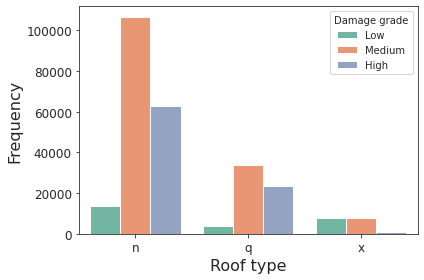

In [51]:


cat_col = ['roof_type', 'ground_floor_type',
                   ]
cat_col_label = [ 'Roof Type', 'Ground Floor Type',
                 ]
with PdfPages('roof.pdf') as pdf:
    sns.countplot(train['roof_type'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Roof type",fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout() 
   # plt.legend(loc='upper right')
    plt.legend(loc='upper right', title="Damage grade")
    pdf.savefig()

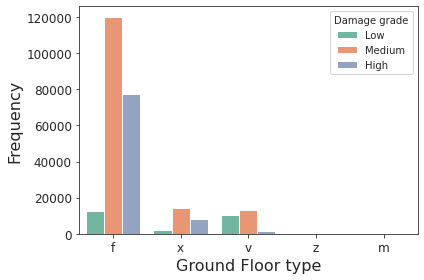

In [52]:
with PdfPages('ground.pdf') as pdf:
    sns.countplot(train['ground_floor_type'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Ground Floor type",fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout() 
    plt.legend(loc='upper right', title="Damage grade")
    pdf.savefig()

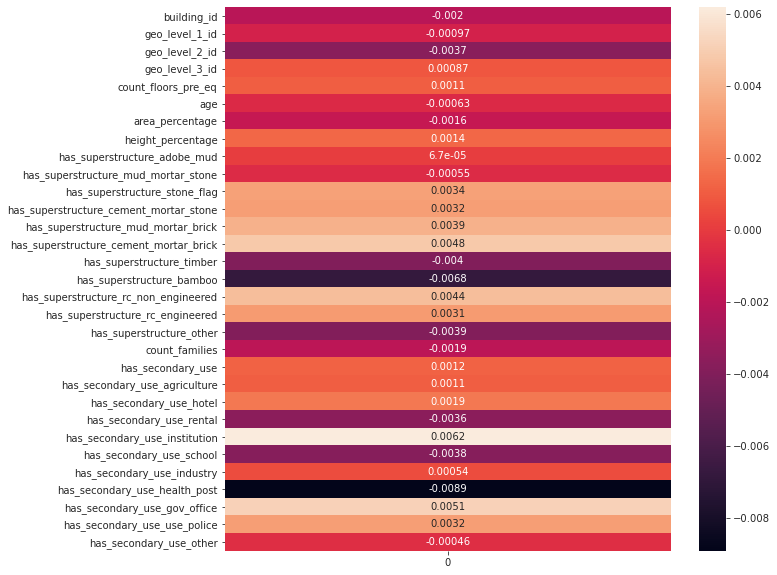

In [26]:
plt.figure(figsize=(10,10))
correlations = train_values.corrwith(train_labels["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()

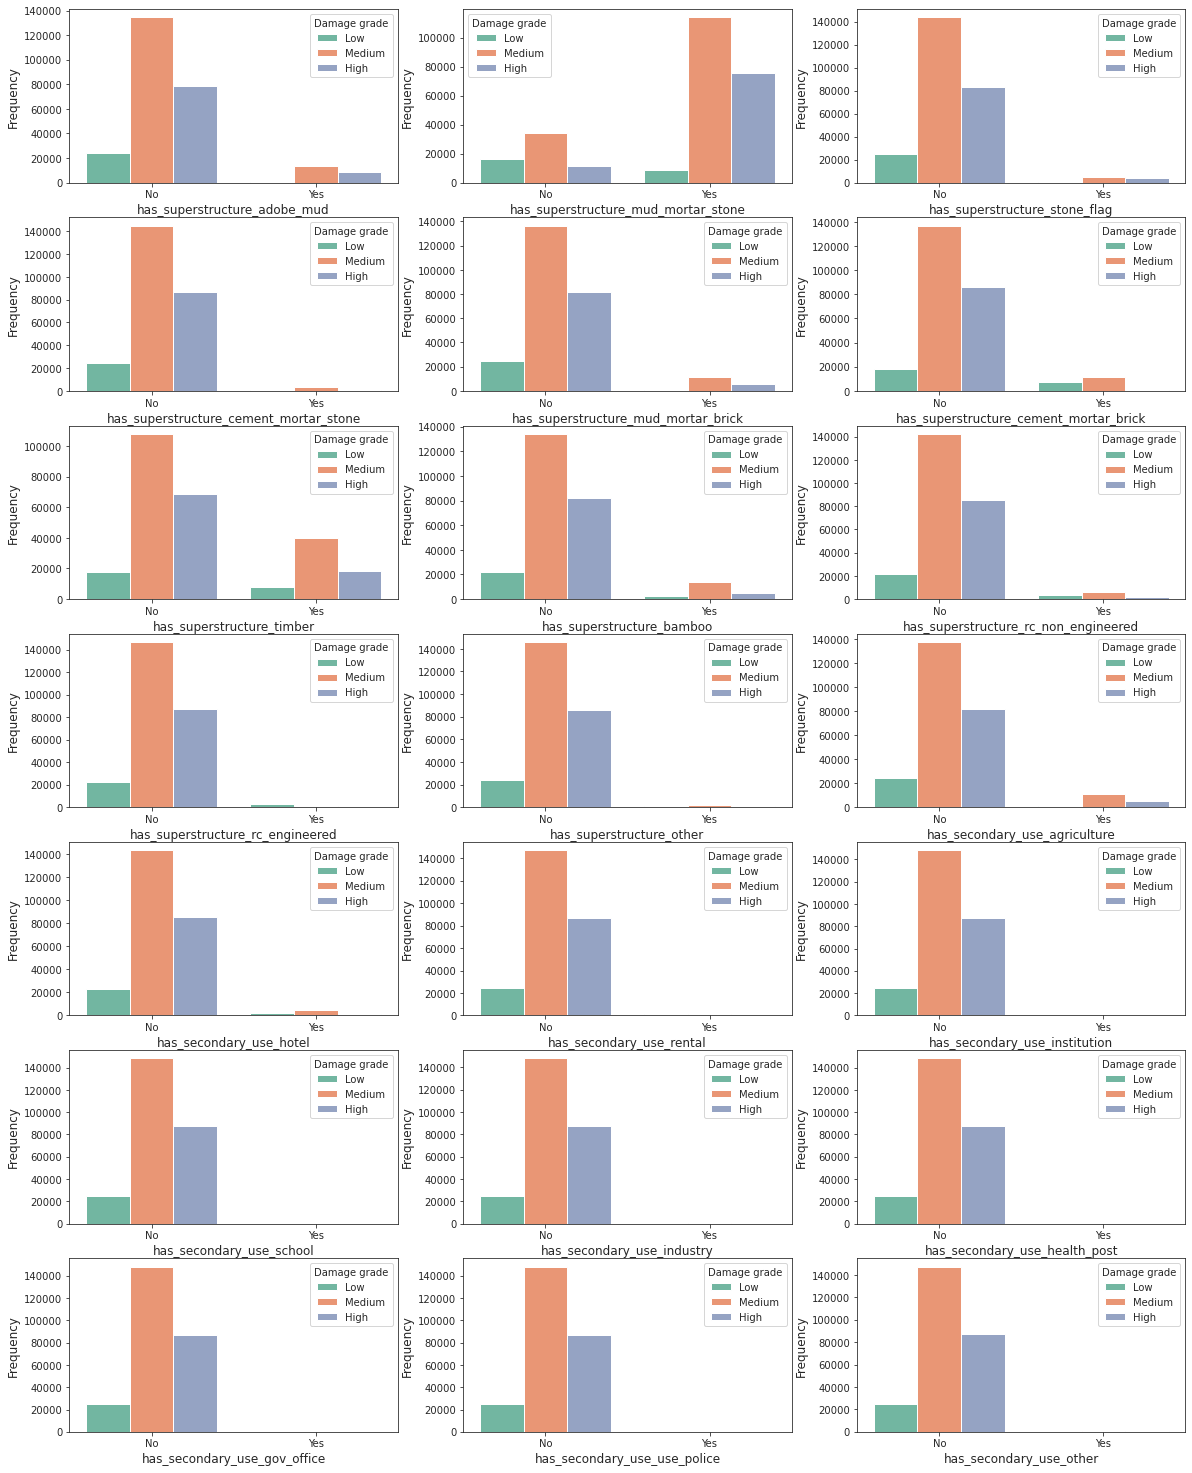

In [25]:
with PdfPages('bin2.pdf') as pdf:
    fig = plt.figure(figsize=(20,30))

    binary_col = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 
                  'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
                  'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                  'has_superstructure_timber', 'has_superstructure_bamboo',
                  'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
                  'has_superstructure_other', 
                  'has_secondary_use_agriculture', 'has_secondary_use_hotel',
                  'has_secondary_use_rental', 'has_secondary_use_institution',
                  'has_secondary_use_school', 'has_secondary_use_industry', 
                  'has_secondary_use_health_post', 'has_secondary_use_gov_office',
                  'has_secondary_use_use_police', 'has_secondary_use_other']

    for i in range(1,22):
        plt.subplot(8,3,int(f'{i}'))
        p = sns.countplot(train[binary_col[i-1]], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
        p.set_xticklabels(['No', 'Yes'])
        plt.xlabel(f'{binary_col[i-1]}', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        #plt.title(f'Damage distribution that \n {binary_col[i-1]}')
        plt.legend(loc='best', title ='Damage grade')
    pdf.savefig()

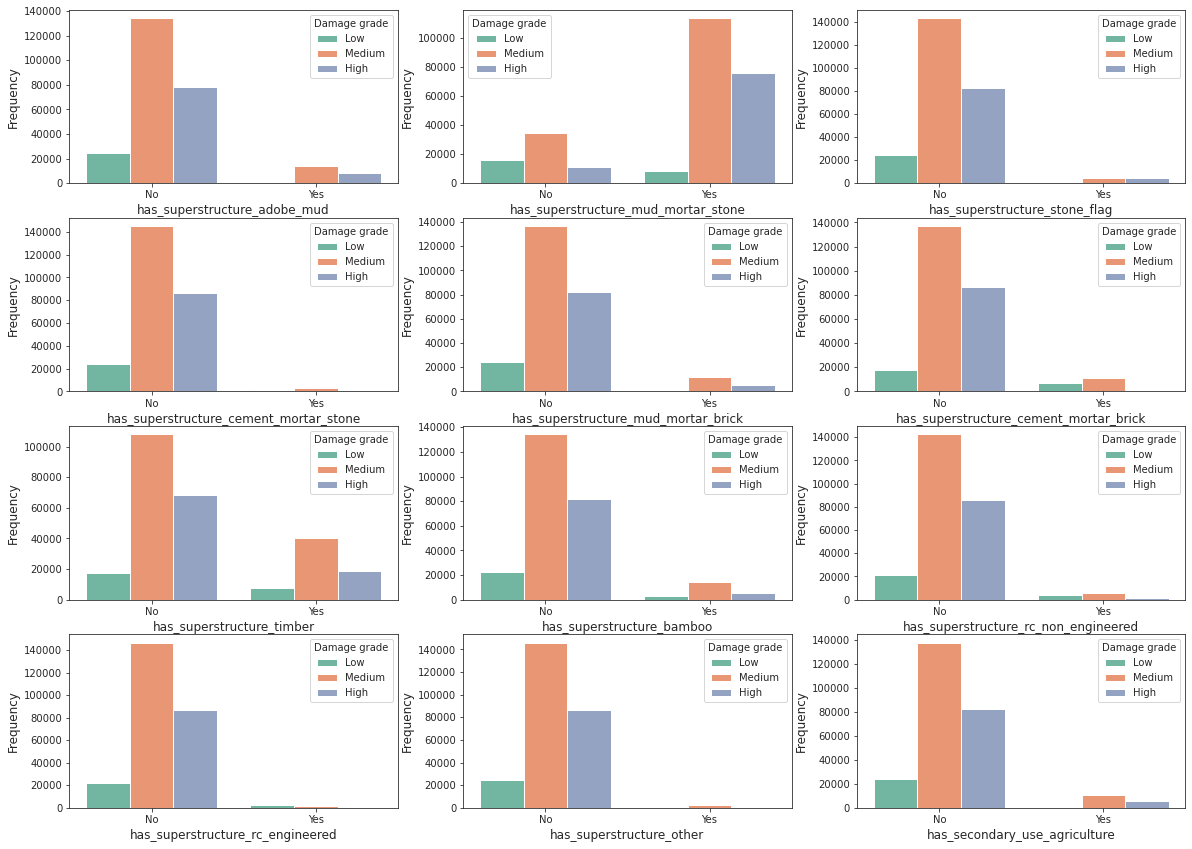

In [20]:
with PdfPages('bin1.pdf') as pdf:
    fig = plt.figure(figsize=(20,30))

    binary_col = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 
                  'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
                  'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                  'has_superstructure_timber', 'has_superstructure_bamboo',
                  'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
                  'has_superstructure_other', 'has_secondary_use_agriculture'
                 ]

    for i in range(1,13):
        plt.subplot(8,3,int(f'{i}'))
        p = sns.countplot(train[binary_col[i-1]], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
        p.set_xticklabels(['No', 'Yes'])
        plt.xlabel(f'{binary_col[i-1]}', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        #plt.title(f'Damage distribution that \n {binary_col[i-1]}')
        plt.legend(loc='best', title ='Damage grade')
    pdf.savefig()

In [4]:
#numerical encoding
df_encoded_train = pd.get_dummies(train_values[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status']])

# Concatenate the dummies to original dataframe

train_values_encoded = pd.concat([train_values, df_encoded_train],  axis='columns')



train_values_encoded.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status'], axis=1, inplace=True)


In [5]:
df_encoded_test = pd.get_dummies(test_values[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status']])
# Concatenate the dummies to original dataframe
test_values_encoded = pd.concat([test_values , df_encoded_test],  axis='columns')
# drop the values
test_values_encoded.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status'], axis=1, inplace=True)



In [67]:
# Create Decision Tree classifer object
clt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clt = clt.fit(train_values_encoded,train_labels)

test_pred = clt.predict(test_values_encoded)


array([3, 3, 3, ..., 2, 2, 1])

In [65]:
print("Accuracy:",metrics.accuracy_score(test_labels, test_pred))

Accuracy: 0.10179813049684579


In [9]:
#Random forest
rf = RandomForestRegressor(n_estimators=350)
rf.fit(train_values_encoded,train_labels)

<ipython-input-9-d7798a35bacb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_values_encoded,train_labels)


RandomForestRegressor(n_estimators=350)

In [20]:
rf_predict_test= rf.predict(test_values_encoded)
rf_predict_test
# View accuracy score
#metrics.accuracy_score(test_labels, rf_predict_test)

array([2.49894558, 2.32857143, 2.19142857, ..., 2.15714286, 2.29428571,
       1.55428571])

Text(0.5, 0, 'Feature Importance')

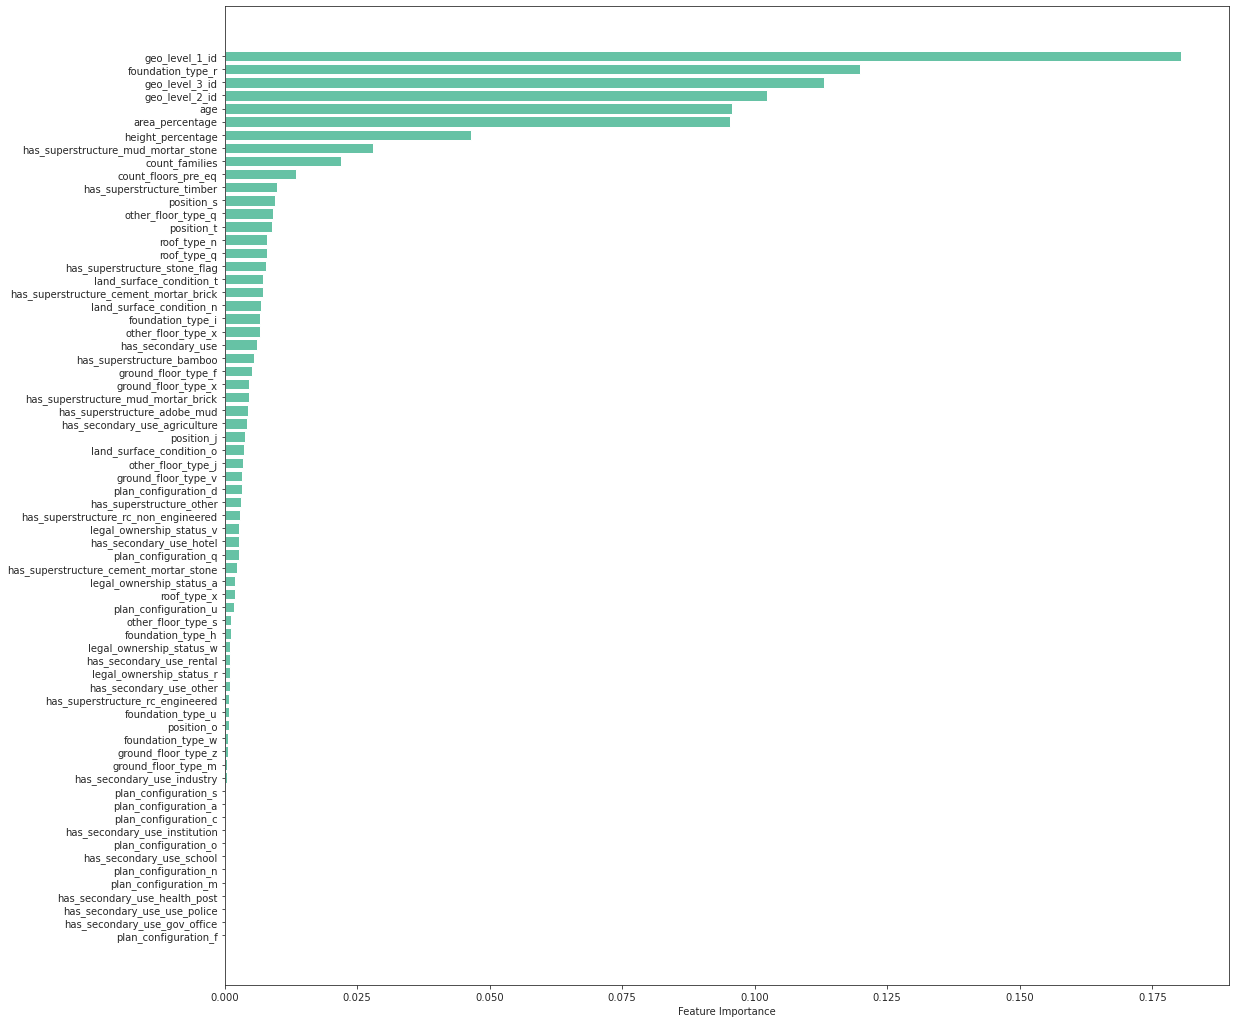

In [15]:
plt.figure(figsize=(18,18))
sort = rf.feature_importances_.argsort()
plt.barh(train_values_encoded.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


Text(0.5, 0, 'Permutation Importance')

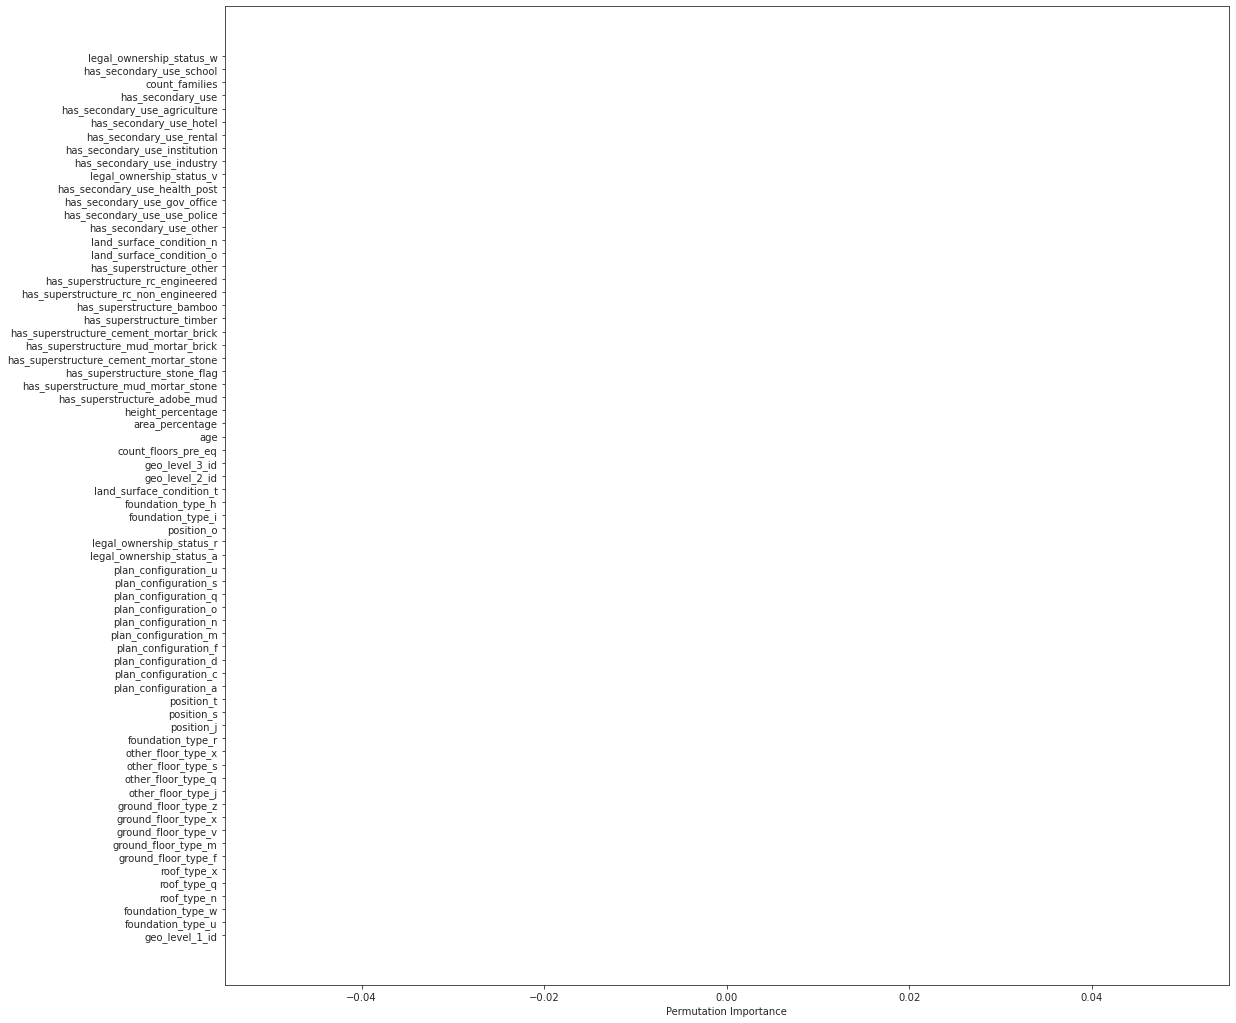

In [22]:
plt.figure(figsize=(18,18))
perm_importance = permutation_importance(rf, test_values_encoded, test_labels)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(train_values_encoded.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")